In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spanish-wine-quality-dataset/wines_SPA.csv


# Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importing the Dataset

In [3]:
df = pd.read_csv('../input/spanish-wine-quality-dataset/wines_SPA.csv')
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


## Checking for Missing Data

In [4]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

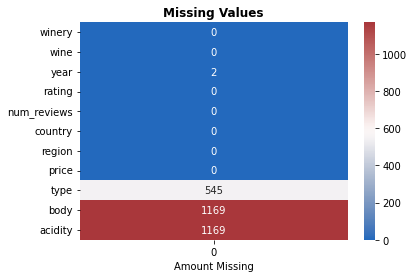

In [5]:
# Missing Values Visualization

plt.title('Missing Values', fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(), annot = True, fmt = 'd', cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

# Data Visualization

In [6]:
df.year.unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

<AxesSubplot:xlabel='price', ylabel='region'>

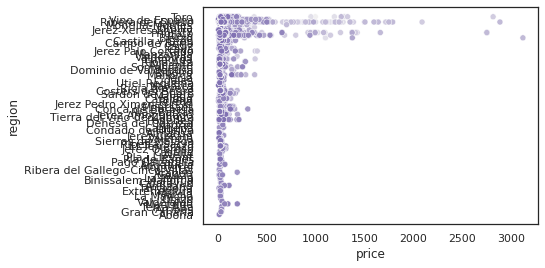

In [7]:
sns.set_theme(style="white")

sns.scatterplot(data=df, x = 'price', y = 'region', hue='rating', palette="light:m_r",legend=False)

<AxesSubplot:xlabel='region', ylabel='price'>

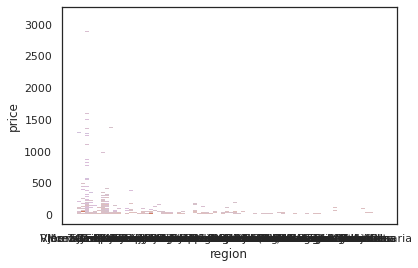

In [8]:
sns.histplot(df, x = 'region', y = 'price',hue='rating', linewidth=.5, multiple="stack", legend=False)

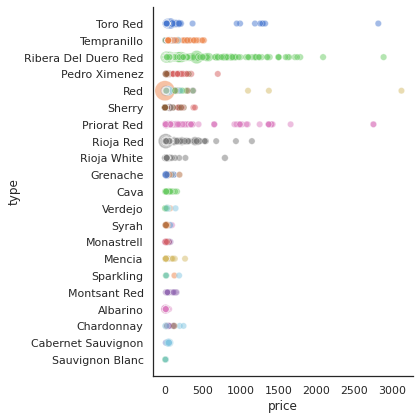

In [9]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x='price',y='type',hue='region',size='num_reviews', sizes=(40, 400), alpha=.5, palette="muted",height=6,data=df, legend=False)

<AxesSubplot:xlabel='price', ylabel='type'>

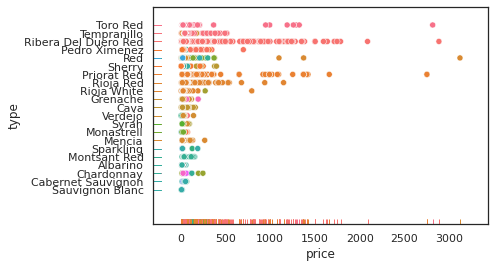

In [10]:
sns.scatterplot(x='price',y='type',hue='region',data=df, legend=False)
sns.rugplot(x='price',y='type',hue='region',data=df, legend=False)

## Imputing or Dropping the Missing Data

> Imputing the Categorical Values manually if needed.

In [11]:
df = df.drop(columns=['country'])

In [12]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [13]:
df = df.dropna()

# Data Manipulation

In [14]:
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [15]:
df['year'] = df.year.replace({'N.V.': 'NaN'})
# df['year'] = df['year'].astype(np.int64)

In [16]:
df.year.unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'NaN', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', '2006', '2000', '2003', '2002',
       '1991', '1994', '1990', '1989', '1987', '1986', '1981', '2001',
       '1968', '1964', '1982', '1974', '1983', '1955', '1980', '1972',
       '1953', '1958', '1942', '1965', '1992', '1973', '1997', '1967',
       '1975', '1910', '1961', '1954', '1988', '1969', '1951', '1928',
       '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

> # Handling Categorical Values

> ## Using Label Encoding

In [19]:
# X_train = pd.DataFrame()
# labenc = LabelEncoder()

# for c in  y.columns:
#     if(y[c].dtype=='object'):
#         X_train[c]=labenc.fit_transform(y[c])
#     else:
#         X_train[c]=y[c]
        
# X_train.head(25)   

# y = labenc.fit_transform(y)

In [20]:
import sys

print('Categorical columns: ')
for col in df.columns:
    if df[col].dtype == 'object':
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str))

Categorical columns: 
winery
wine
year
region
type


In [21]:
df = (df-df.mean())/df.std()
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,1.280878,1.314818,-0.061449,5.153207,-0.534781,1.139664,5.715504,2.158801,1.442853,0.214745
1,-1.806417,1.548023,0.698440,5.153207,-0.572355,1.337266,1.524237,1.884046,-0.271398,-3.818247
2,1.498166,1.394207,-0.669360,4.348742,1.879645,0.349256,1.594655,-0.039245,1.442853,0.214745
3,1.498166,1.394207,-2.189137,4.348742,1.757184,0.349256,3.857939,-0.039245,1.442853,0.214745
4,1.498166,1.394207,-2.645070,4.348742,1.206110,0.349256,4.381310,-0.039245,1.442853,0.214745


In [22]:
# s = (df.dtypes == 'object')

# obj_cols = list(s[s].index)

In [23]:
# OH_scale = OrdinalEncoder()

# X[obj_cols] = OH_scale.fit_transform(X[obj_cols])

In [24]:
# scaler = MinMaxScaler()

# X_train = pd.DataFrame(scaler.fit_transform(X[['winery', 'wine', 'year', 'num_reviews', 'country', 'region', 'type', 'body', 'acidity']]))

# scaler = StandardScaler()
# scaler.fit(X)
# X_train = scaler.transform(X)

In [25]:
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,1.280878,1.314818,-0.061449,5.153207,-0.534781,1.139664,5.715504,2.158801,1.442853,0.214745
1,-1.806417,1.548023,0.698440,5.153207,-0.572355,1.337266,1.524237,1.884046,-0.271398,-3.818247
2,1.498166,1.394207,-0.669360,4.348742,1.879645,0.349256,1.594655,-0.039245,1.442853,0.214745
3,1.498166,1.394207,-2.189137,4.348742,1.757184,0.349256,3.857939,-0.039245,1.442853,0.214745
4,1.498166,1.394207,-2.645070,4.348742,1.206110,0.349256,4.381310,-0.039245,1.442853,0.214745
...,...,...,...,...,...,...,...,...,...,...
7495,-0.801462,0.684667,0.394484,-0.478053,-0.069987,0.480991,-0.280929,0.235511,-0.271398,0.214745
7496,-0.810516,-0.084415,0.698440,-0.478053,-0.072770,0.151654,-0.300732,-0.588756,-0.271398,0.214745
7497,0.574693,-0.635177,0.546462,-0.478053,-0.072770,-1.429162,-0.253438,-0.314000,-0.271398,0.214745
7498,0.429835,-0.491284,-0.365404,-0.478053,-0.074162,0.349256,-0.007128,-0.039245,1.442853,0.214745


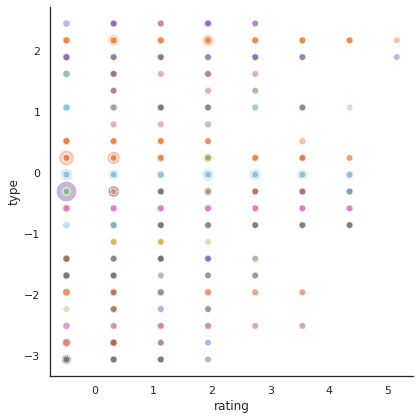

In [26]:
sns.relplot(x='rating',y='type',hue='region',size='num_reviews', sizes=(40, 400), alpha=.5, palette="muted",height=6,data=df, legend=False)

In [27]:
# df = df.reset_index()

In [28]:
# df.wine.unique()

# Modeling

In [29]:
X = df.drop(['price'], axis=1)
y = df['price']

In [30]:
X.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
type           0
body           0
acidity        0
dtype: int64

In [31]:
# X = X.drop(columns=['country'])

> ## Spliting the Dataset

In [32]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)

> ## Pipelining the models

In [33]:
# pipeline_lor = Pipeline(steps=[
#     ('scale', OH_scale),
#     ('model', LogisticRegression(solver='lbfgs',max_iter = 100))
# ])

# pipeline_rf = Pipeline(steps=[
#     ('scale', labenc),
#     ('model', RandomForestRegressor(random_state=0))
# ])

In [34]:
# pipeline_rf.fit(train_X, train_y)

In [35]:
models = {}
def train_validate_predict(regressor,train_X, train_y, val_X, val_y, index):
    model = regressor
    model.fit(train_X, train_y)
    
    y_pred = model.predict(val_X)

    r2 = r2_score(val_y, y_pred)
    models[index] = r2

In [36]:
model_list = [Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
              RandomForestRegressor]
model_names = ['Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Linear SVR', 
               'KNeighbors Regressor', 'Random Forest Regressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(),train_X, train_y ,val_X, val_y, model_names[index])
    index+=1

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [37]:
models

{'Lasso': -0.0014325966292030312,
 'Ridge': 0.3332745102417698,
 'Bayesian Ridge': 0.3338193750537626,
 'Decision Tree Regressor': 0.07983945126285263,
 'Linear SVR': 0.2057028220270729,
 'KNeighbors Regressor': 0.341166587465462,
 'Random Forest Regressor': 0.5086531189639238}

In [38]:
model = RandomForestRegressor()
model.fit(train_X, train_y)
    
y_pred = model.predict(val_X)
preds = pd.DataFrame({'y_pred': y_pred, 'y_test':val_y})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

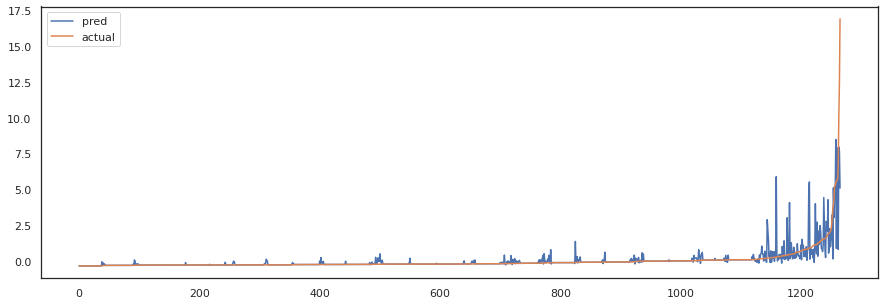

In [39]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()

In [40]:
print('Error',mean_squared_error(y_pred, val_y))

Error 0.3390353242425065


## Using SMOTE[Synthetic Minority Over-sampling Technique]
This Technique is use to balance the dataset.

In [41]:
## WILL LATER COME BACK WITH MORE PREPERATION 

# --Fucking Hell this took all day--